In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
#dataframe = pd.read_csv("Zomato data .csv")
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,5.0,775,800,Buffet
1,Spice Elephant,Yes,No,5.0,787,800,Buffet
2,San Churro Cafe,Yes,No,5.0,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,5.0,88,300,Buffet
4,Grand Village,No,No,5.0,166,600,Buffet


In [64]:
dataframe= pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [66]:

def handleRate (value): 
    value=str(value).split('/')
    value=value[0];
    return float(value)
    
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [72]:
dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


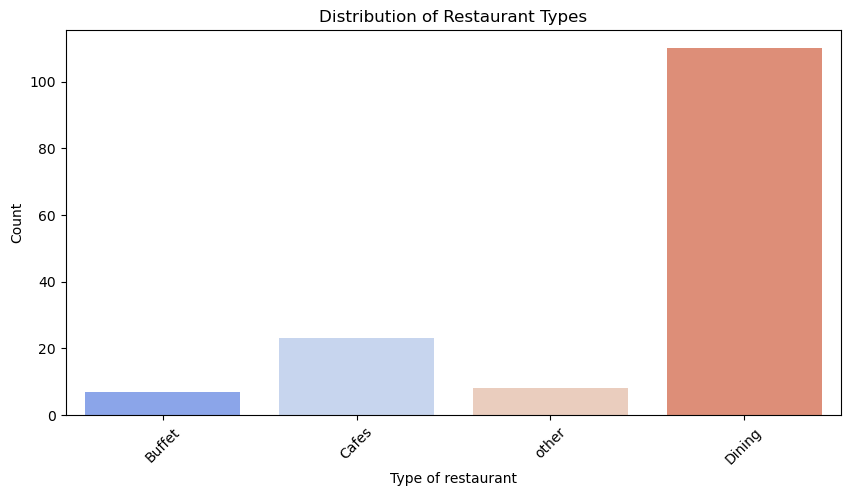

In [44]:
#sns.countplot(x=dataframe['listed_in(type)'])
# plt.xlabel("Type of restaurant")
plt.figure(figsize=(10, 5))
sns.countplot(x="listed_in(type)", hue="listed_in(type)", data=dataframe, palette="coolwarm", legend=False)  
plt.xlabel("Type of restaurant")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Distribution of Restaurant Types")
plt.show()
#What type of restaurant do the majority of customers order from?     

Text(0, 0.5, 'Votes')

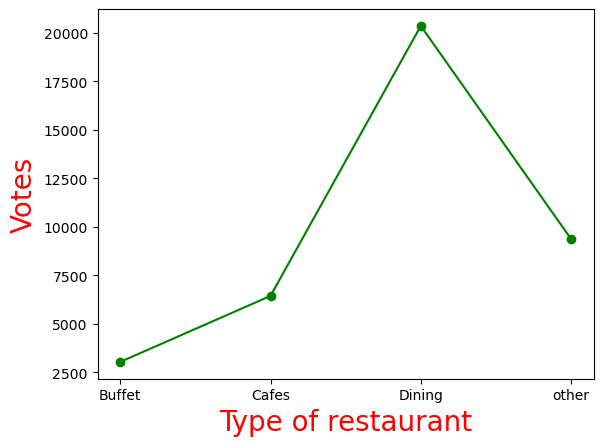

In [15]:
grouped_data = dataframe.groupby("listed_in(type)")['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
#How many votes has each type of restaurant received from customers

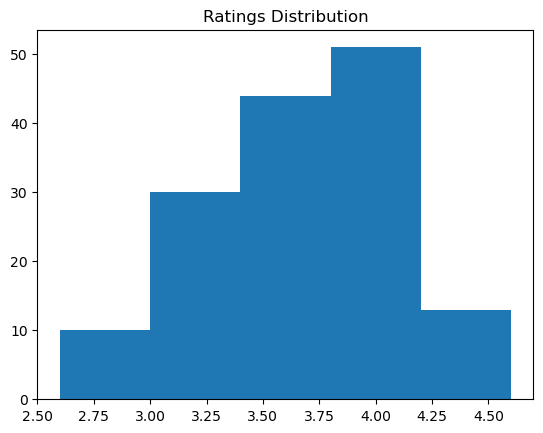

In [17]:

plt.hist(dataframe['rate'], bins=5) 
plt.title("Ratings Distribution")
plt.show()
#What are the ratings that the majority of restaurants have received

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

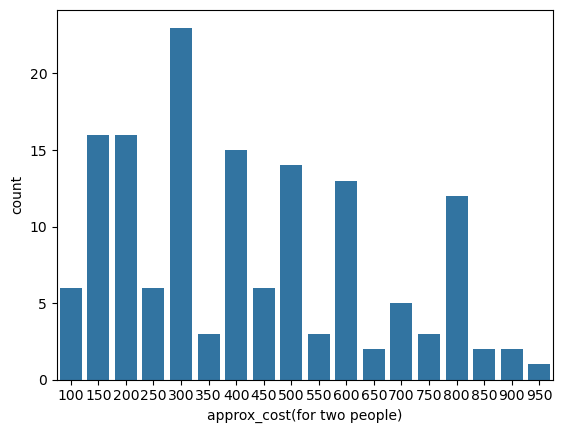

In [21]:

couple_data=dataframe['approx_cost(for two people)'] 
sns.countplot(x=couple_data)
#It has observed that most of 2 people or couples order most of their food online. What is their average spending on each order

<Axes: xlabel='online_order', ylabel='rate'>

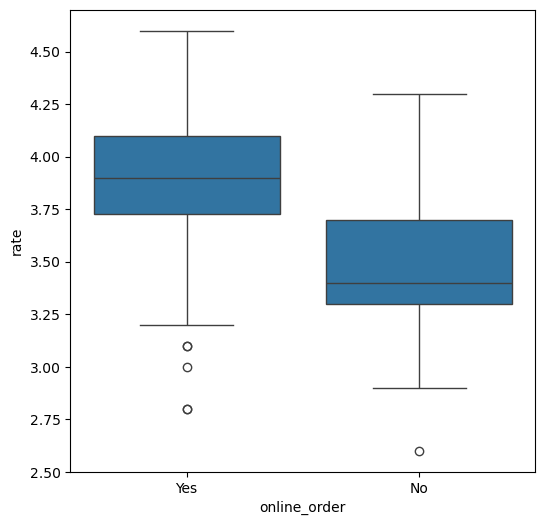

In [25]:

plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)
#Which mode (online or offline) has received the maximum rating?

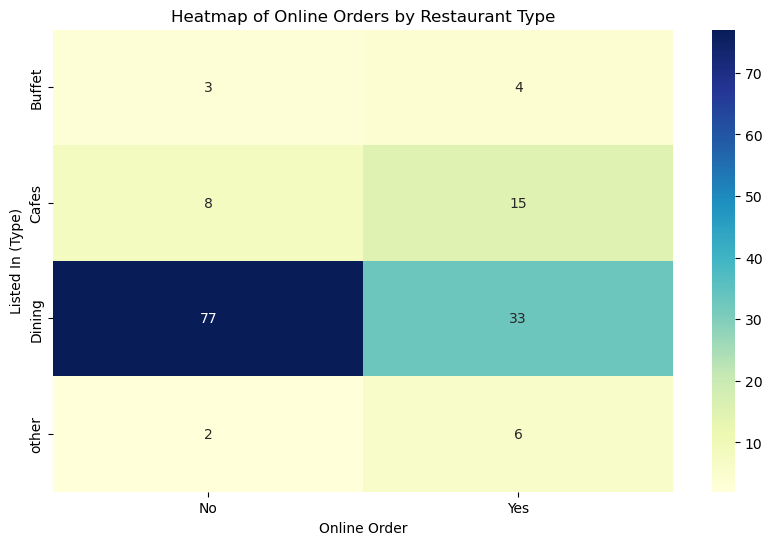

In [46]:

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of Online Orders by Restaurant Type")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()
#Which type of restaurant received more offline orders